<a href="https://colab.research.google.com/github/thecodinguru/DS-Unit-1-Build/blob/master/Uzomeziem-Eze-DS-18-Build-Week-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Could  we have seen Tesla rise beforehand?**

###Due to the historic increase in Tesla's stock price, I want to know if we could have seen this rise before hand. The price exceeds $400 on 12-19-2019, and has continued upward (except for COVID-19 drop).

###So the question I want to answer is, can we see signs of this rise before the 12-19-2019 date?

#**Importing The Data**

In [ ]:
#load libraries
%matplotlib inline 
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn')
plt.rcParams['lines.linewidth'] = 1
import plotly.io as pio

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#load dataset locally
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
###Tesla stock price from 2010 - 2020###
tesla_df = pd.read_csv('TSLA.csv',
                        parse_dates=['Date'],
                        index_col= ['Date'])

In [ ]:
tesla_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-21,1639.930054,1675.000000,1558.000000,1568.359985,1568.359985,16157300
2020-07-22,1599.000000,1626.420044,1562.000000,1592.329956,1592.329956,14161100
2020-07-23,1678.949951,1689.000000,1480.770020,1513.069946,1513.069946,24328500
2020-07-24,1416.010010,1465.000000,1366.540039,1417.000000,1417.000000,19396600
2020-07-27,1435.000000,1547.939941,1413.000000,1539.599976,1539.599976,15988400


In [ ]:
tesla_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
print(tesla_df.isnull().sum(), '\n')

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 



##**Now....Lets Clean Some Data!**

###We will be using a dataset showing Tesla's stock price for the past 10 years from 07-12-2010 to 07-10-2020. We only want to work on the dates Tesla stock price rose from $400 onward (12-19-2020------->).

###This dataset was relatively clean so there will be some minor touching up we will do so we can make it ready to use in the fashion we want.


###You can find the raw dataset at: https://finance.yahoo.com/quote/TSLA/history?p=TSLA


Lets get rid of the `Adj Close` column

In [ ]:
###Drop extra columns using drop method###
tesla_df = tesla_df.drop(columns=['Adj Close'])

###Show###
tesla_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


Now lets round out all float objects to keep consistency of currency value

In [ ]:
##Round float dataframe columns so it still identifies as currency########
tesla_df['Open'] = round(tesla_df['Open'], 2)
tesla_df['Close'] = round(tesla_df['Close'], 2)
tesla_df['High'] = round(tesla_df['High'], 2)
tesla_df['Low'] = round(tesla_df['Low'], 2)

###SHOW###
tesla_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.00,25.00,17.54,23.89,18766300
2010-06-30,25.79,30.42,23.30,23.83,17187100
2010-07-01,25.00,25.92,20.27,21.96,8218800
2010-07-02,23.00,23.10,18.71,19.20,5139800
2010-07-06,20.00,20.00,15.83,16.11,6866900


#**Tesla Stock Chart (10 years)**

In [ ]:
#Plot Tesla Stock Chart
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x = tesla_df.index,
    open = tesla_df['Open'], high = tesla_df['High'],
    low = tesla_df['Low'], close = tesla_df['Close'],
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.show()

#**Shape & Trend of Data**

##Build a rolling moving average of 20 & 100 days

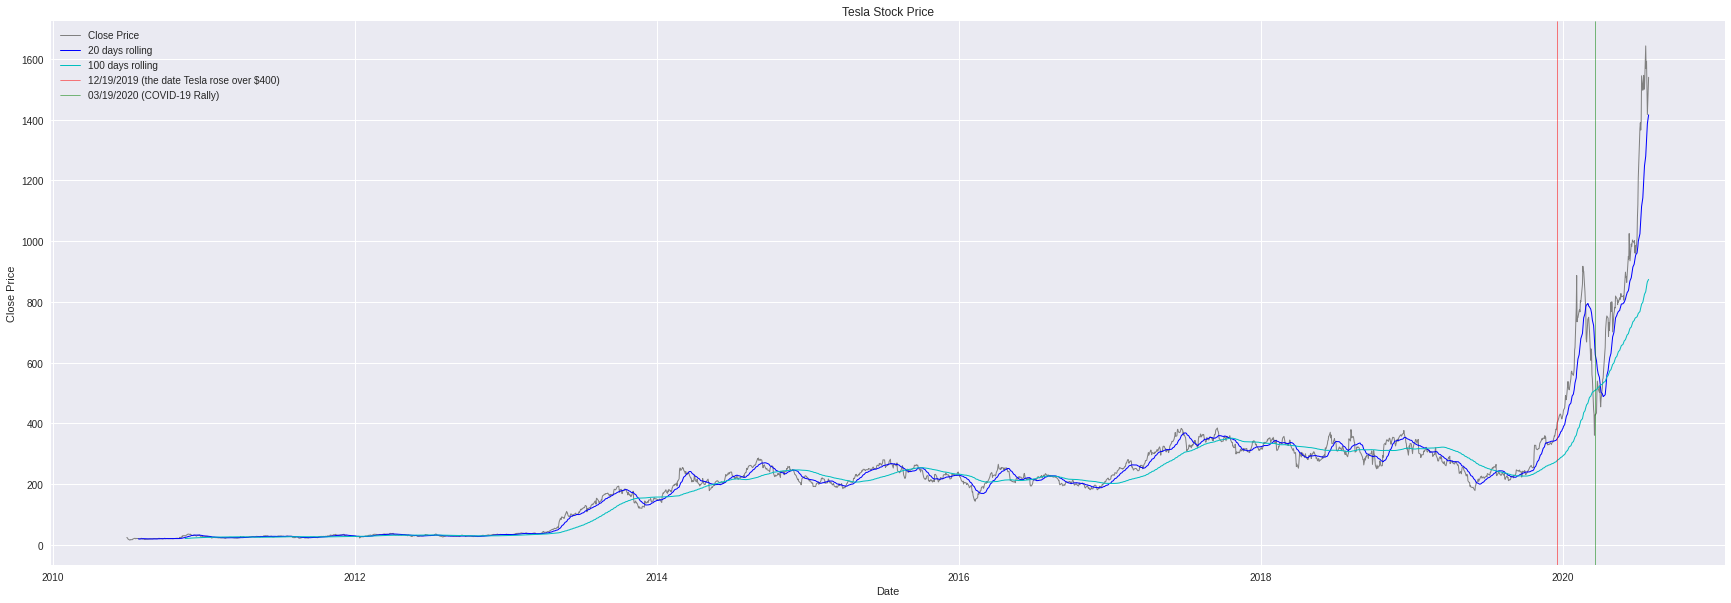

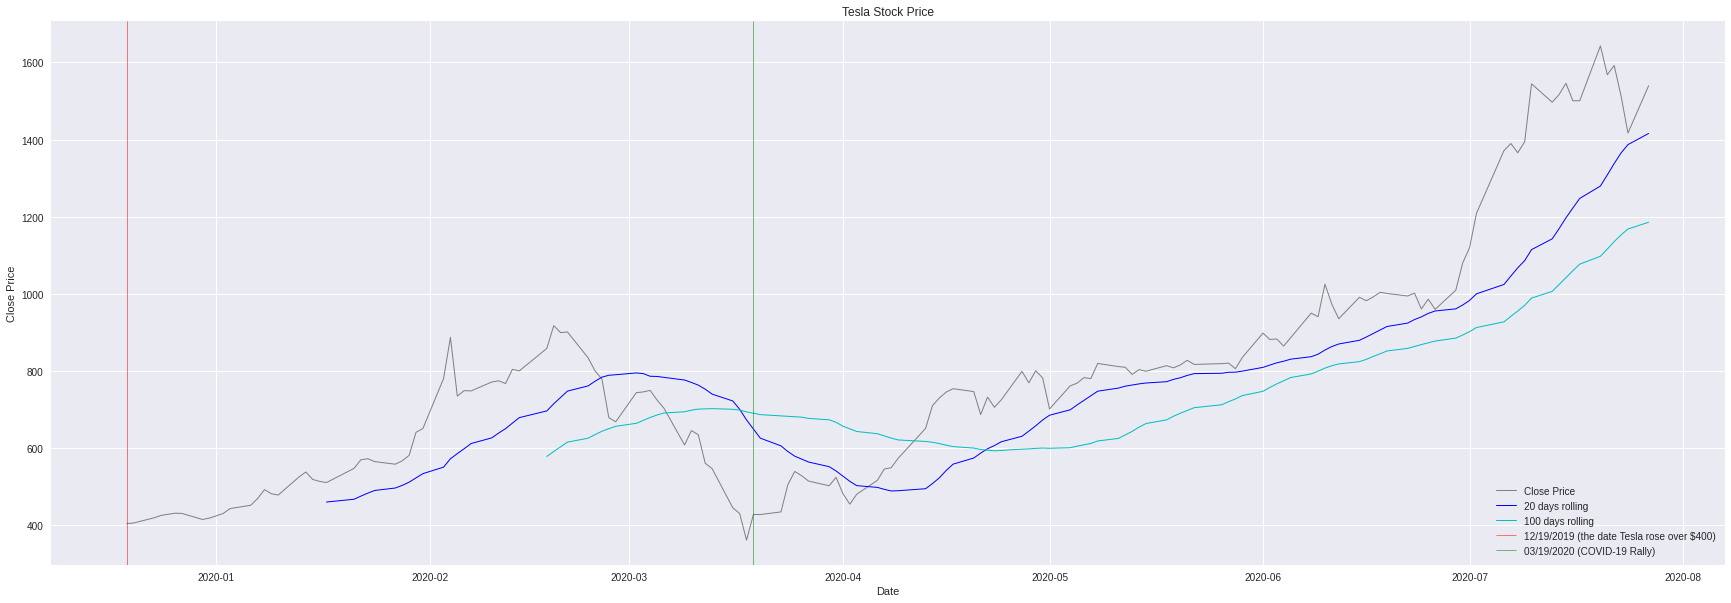

In [ ]:
#create function to calculate and show MA of Tesla on 20/100 windows respectively. 
def plot_with_rolling(data,short_rolling,long_rolling,lbl='Close'):

    fig, ax = plt.subplots(figsize=(30,10))

    ax.plot(data.index, data, label=lbl, c = '0.5')
    ax.plot(short_rolling.index, short_rolling, label='20 days rolling', c = 'b')
    ax.plot(long_rolling.index, long_rolling, label='100 days rolling', c = 'c')
    ax.axvline(x='2019-12-19',linewidth=0.5, color='r', label='12/19/2019 (the date Tesla rose over $400)')
    ax.axvline(x='2020-03-19',linewidth=0.5, color='g', label='03/19/2020 (COVID-19 Rally)')
    ax.set_xlabel('Date')
    ax.set_ylabel(lbl)
    ax.set_title("Tesla Stock Price")
    ax.legend()

    plt.show()

# Subset data to the last 5 years: July 2015-July 2020
tesla_df_subset = tesla_df['2019-12-19'::]

#Total View of Tesla Dataset
short = tesla_df.Close.rolling(window=20).mean()
long = tesla_df.Close.rolling(window=100).mean() 
plot_with_rolling(data=tesla_df.Close,short_rolling=short,long_rolling=long,lbl='Close Price')  

#Zoomed in view of subset dataset
short = tesla_df_subset.Close[tesla_df_subset.index>'2018-12-31'].rolling(window=20).mean()
long = tesla_df_subset.Close[tesla_df_subset.index>'2018-12-31'].rolling(window=40).mean() 
plot_with_rolling(data=tesla_df_subset.Close[tesla_df_subset.index>'2018-12-21'],short_rolling=short,long_rolling=long,lbl='Close Price')

The trend was really bullish since September 2019 but what is even more remarkable is perhaps the slope of the 20-day moving average during the last months before our end point (2019-07)

On the zoom, we see that the rise is very powerful after the beginning of September, the stock crossed over our 100 day moving average and besides our COVID-19 decline this year, we can see it has been on an upward trajectory since.

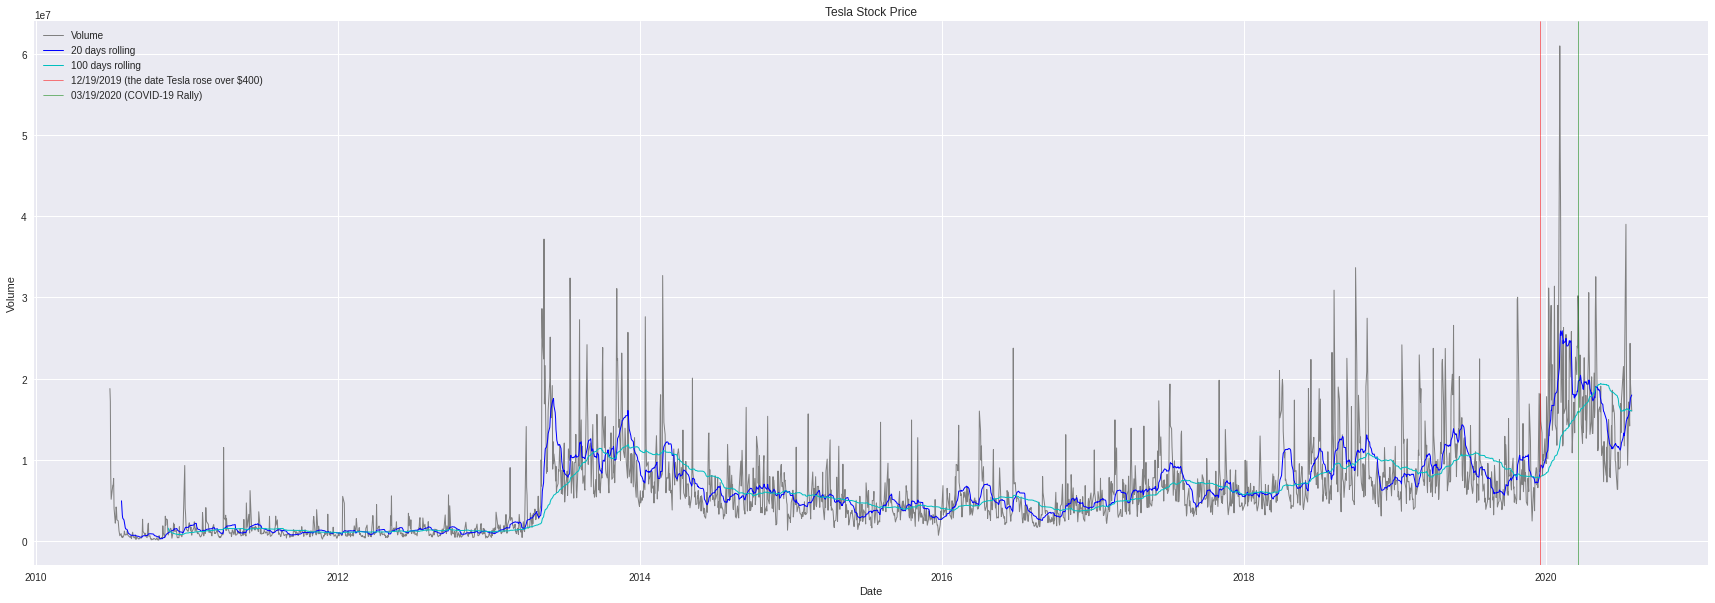

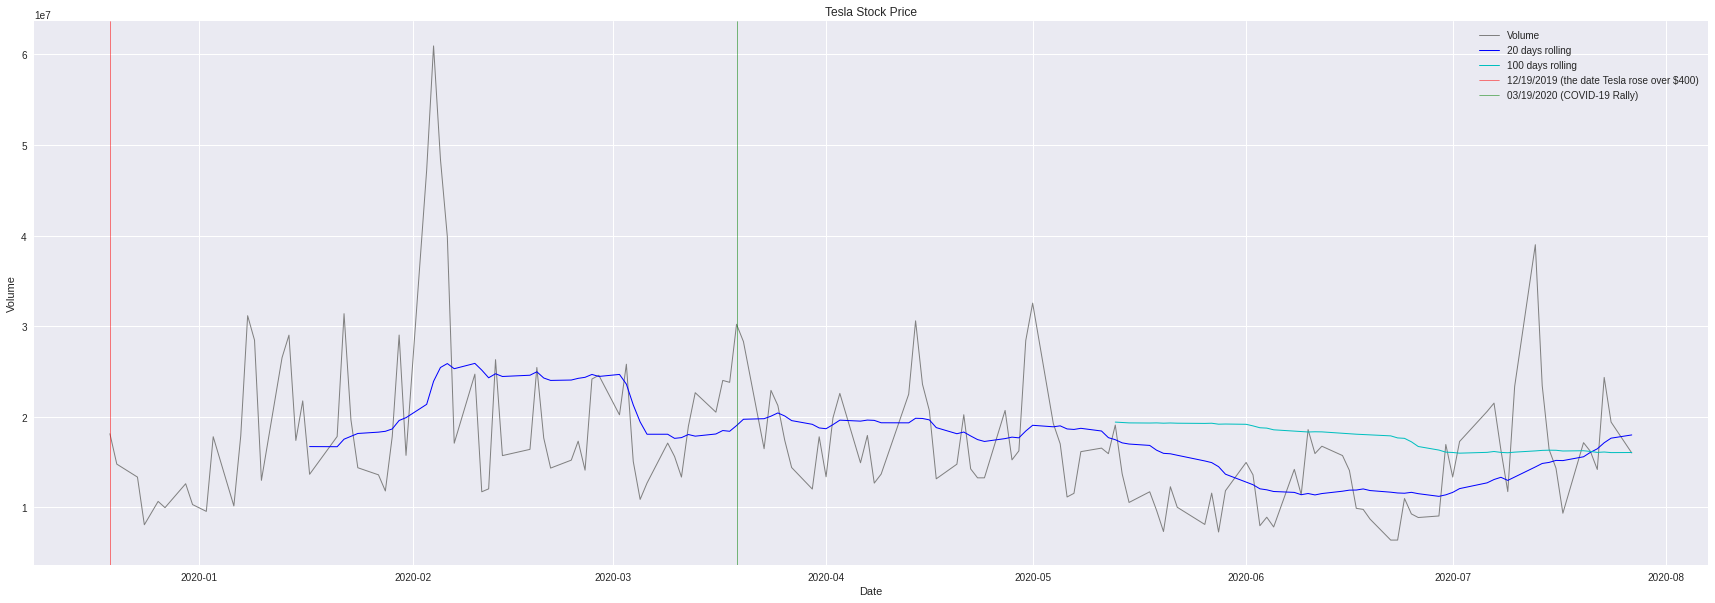

In [ ]:
#Volume analysis
short = tesla_df.Volume.rolling(window=20).mean()
long = tesla_df.Volume.rolling(window=100).mean()
plot_with_rolling(data=tesla_df.Volume,short_rolling=short,long_rolling=long,lbl='Volume')

#Subset Volume analysis
short = tesla_df_subset.Volume[tesla_df_subset.index>'2018-12-21'].rolling(window=20).mean()
long = tesla_df_subset.Volume[tesla_df_subset.index>'2018-12-21'].rolling(window=100).mean() 
plot_with_rolling(data=tesla_df_subset.Volume[tesla_df_subset.index>'2018-12-21'],short_rolling=short,long_rolling=long,lbl='Volume')

Volume was not exceptionally high prior our start point (2019-12-19),
but volumes are constantly very high after that date, even during the COVID-19 pandemic. 

#**Calculate Daily Returns**

In [ ]:
# Calculate the daily return
daily_rtn_full = tesla_df.Close.pct_change(100)

daily_rtn_full.describe()

count    2437.000000
mean        0.246070
std         0.568666
min        -0.466319
25%        -0.068669
50%         0.093689
75%         0.316910
max         3.366430
Name: Close, dtype: float64

In [ ]:
# Calculate the daily return
daily_rtn_sub = tesla_df_subset.Close.pct_change(100)

daily_rtn_sub.describe()

count    51.000000
mean      0.792630
std       0.228270
min       0.081934
25%       0.710317
50%       0.799782
75%       0.910520
max       1.383763
Name: Close, dtype: float64

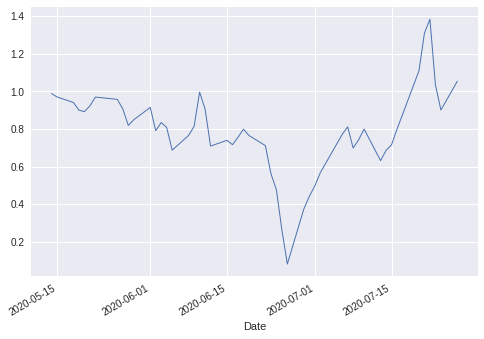

In [ ]:
daily_rtn_sub.plot()

#**Variance of Closing Price & Volume**

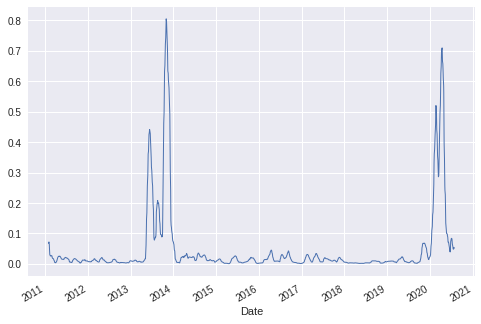

In [ ]:
#Variance plot of daily returns
daily_rtn_full.rolling(50).var().plot()
plt.show()

There is no spike of variance of the daily returns before the rise

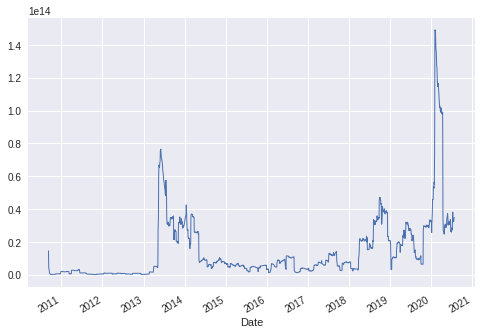

In [ ]:
tesla_df['Volume'].rolling(50).var().plot()
plt.show()

There is no spike of variance of the volumes before the rise

#**MACD (Moving Average Convergence-Divergence)**

https://www.investopedia.com/terms/m/macd.asp

-------------------------------------------------------------

MACD line	Description:

positive and rising  -	Market’s bullish momentum is accelerating

negative and falling -	Market’s bearish momentum is accelerating

positive but falling -	The bullish momentum in the market is fading

negative but increasing -	The bearish momentum in the market is fading

zero      -       	Balanced

In [ ]:
#Calculate short and long EMA
ema_short = tesla_df_subset.Close.ewm(span=12, adjust=False).mean()
ema_long = tesla_df_subset.Close.ewm(span=26, adjust=False).mean()
macd_line = ema_short - ema_long
macd_signal = macd_line.ewm(span=9, adjust=False).mean()

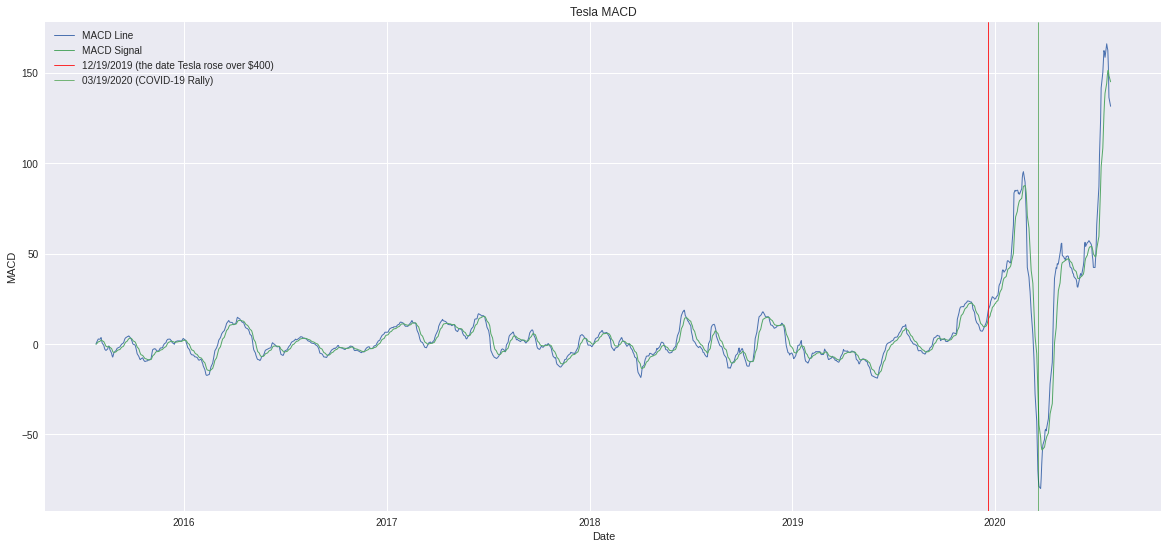

In [ ]:
# Plot MACD
fig, ax = plt.subplots(figsize=(20,9))

ax.plot(macd_line.index, macd_line, label='MACD Line')
ax.plot(macd_signal.index, macd_signal, label='MACD Signal')
ax.axvline(x='2019-12-19',linewidth=0.8, color='r', label='12/19/2019 (the date Tesla rose over $400)')
ax.axvline(x='2020-03-19',linewidth=0.5, color='g', label='03/19/2020 (COVID-19 Rally)')
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
ax.set_title("Tesla MACD")
ax.legend()

plt.show()

#**Momentum**

https://www.macroption.com/momentum/

Momentum shows how much the closing price has changed but also indicates how strong a trend is.

Momentum is the difference between current closing price and the closing price (n) days before

Momentum = Close(Today) – Close(Today - n days)

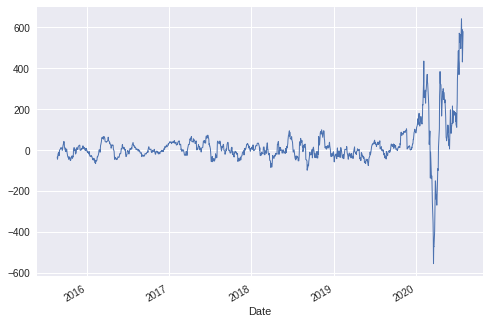

In [ ]:
momentum = tesla_df_subset.Close.diff(20)
momentum.plot()
plt.show()

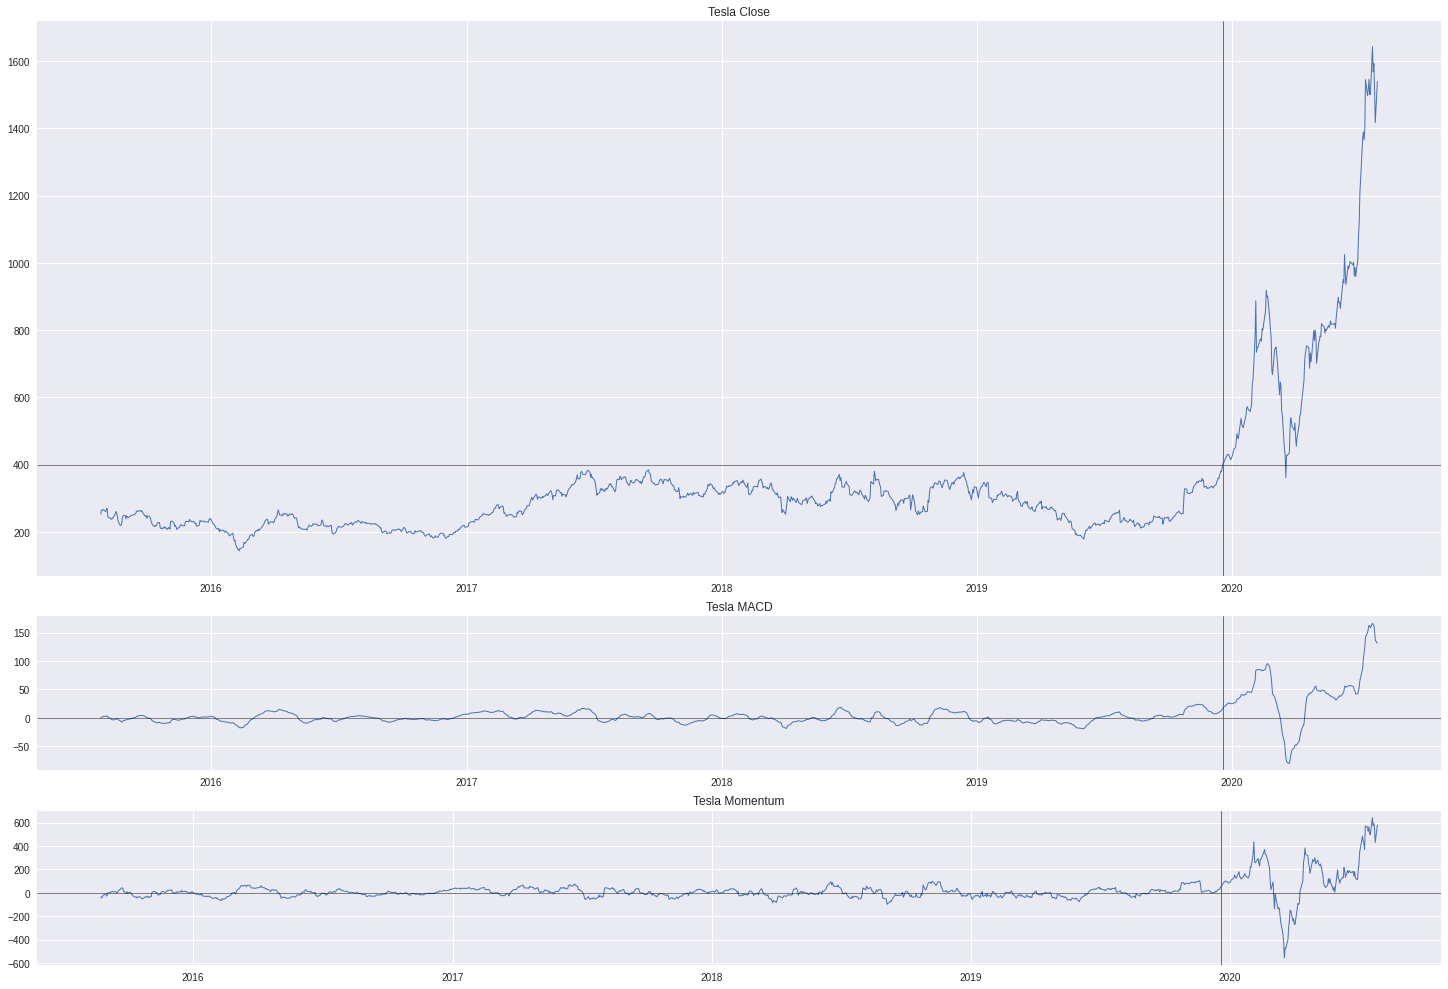

In [ ]:
#function plotting all the indictors 
def plot_all(close=tesla_df_subset.Close,macd=macd_line,momentum=momentum):
    fig = plt.figure(constrained_layout=True,figsize=(20,16))
    gs = fig.add_gridspec(10, 1)
    ax1 = fig.add_subplot(gs[:4, 0])
    ax1.set_title('Tesla Close')
    ax1.plot(close.index, close, label='Close')
    ax1.axhline(y=400,linewidth=0.5, color='black')
    ax1.axvline(x='2019-12-19',linewidth=0.8, color='r')
    ax2 = fig.add_subplot(gs[4:6,0])
    ax2.set_title('Tesla MACD')
    ax2.plot(macd.index, macd)
    ax2.axhline(y=0,linewidth=0.5, color='black')
    ax2.axvline(x='2019-12-19',linewidth=0.8, color='r')
    ax3 = fig.add_subplot(gs[6:8,0])
    ax3.set_title('Tesla Momentum')    
    ax3.plot(momentum.index, momentum)
    ax3.axhline(y=0,linewidth=0.5, color='black')
    ax3.axvline(x='2019-12-19',linewidth=0.8, color='r')
    plt.show()
plot_all()